Submision machine learning Zidni Ridwan Nulmuarif

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import zipfile, os
from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/Dicoding_ML

local_zip = '/content/gdrive/MyDrive/Dicoding_ML/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/MyDrive/Dicoding_ML')
zip_ref.close()

base_dir  = '/content/gdrive/MyDrive/Dicoding_ML/rockpaperscissors/rps-cv-images'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Dicoding_ML


In [5]:
# Showing list dir
os.listdir(base_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [6]:
# augmentasi training model
train_datagen = ImageDataGenerator(
    rescale = 1./255,                       #pixel being 0 and 1
    shear_range = 0.2,                      #citra being 20%
    rotation_range = 20,                    #citra rotate 20%
    fill_mode = 'wrap',                     #add border citra
    horizontal_flip = True,                 #rotate to 50%
    validation_split = 0.4                  #40% validation adn 60% train
)

In [8]:
# result image from batch
training_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    shuffle = True,
    subset = 'training'
)
# result bacth validation
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
# neural network for "batu, kertas, gunting"
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')
])


In [10]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [12]:
# Training model
model.fit(
    training_generator,
    steps_per_epoch = 16,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2
)

Epoch 1/15
16/16 - 20s - loss: 1.0501 - accuracy: 0.4648 - val_loss: 0.8043 - val_accuracy: 0.7578 - 20s/epoch - 1s/step
Epoch 2/15
16/16 - 17s - loss: 0.6635 - accuracy: 0.7852 - val_loss: 0.4677 - val_accuracy: 0.8125 - 17s/epoch - 1s/step
Epoch 3/15
16/16 - 18s - loss: 0.3585 - accuracy: 0.8651 - val_loss: 0.5025 - val_accuracy: 0.7969 - 18s/epoch - 1s/step
Epoch 4/15
16/16 - 21s - loss: 0.3076 - accuracy: 0.8848 - val_loss: 0.3379 - val_accuracy: 0.8750 - 21s/epoch - 1s/step
Epoch 5/15
16/16 - 16s - loss: 0.2885 - accuracy: 0.8880 - val_loss: 0.3888 - val_accuracy: 0.8984 - 16s/epoch - 1s/step
Epoch 6/15
16/16 - 16s - loss: 0.2912 - accuracy: 0.8809 - val_loss: 0.2851 - val_accuracy: 0.9062 - 16s/epoch - 991ms/step
Epoch 7/15
16/16 - 16s - loss: 0.2374 - accuracy: 0.9238 - val_loss: 0.2441 - val_accuracy: 0.9219 - 16s/epoch - 1s/step
Epoch 8/15
16/16 - 19s - loss: 0.1558 - accuracy: 0.9512 - val_loss: 0.1040 - val_accuracy: 0.9766 - 19s/epoch - 1s/step
Epoch 9/15
16/16 - 16s - loss

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm (1).png


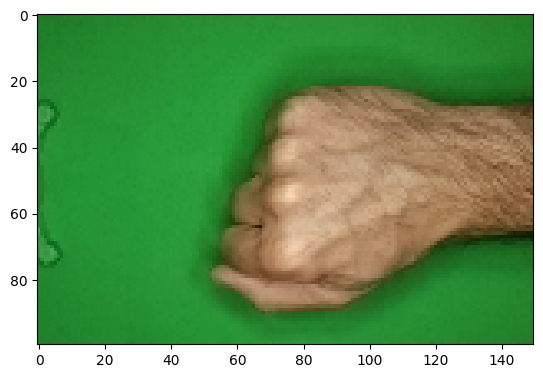

1/1 [==============================] - 0s 29ms/step
0bioBZYFCXqJIulm (1).png
Gambarnya batuu niiih


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Simulate the file upload (for this example, let's assume 'files.upload()' is already done)
uploaded = files.upload()

for gambar in uploaded.keys():                                # for loop
  path = gambar                                               # show path
  img = image.load_img(path, target_size=(100, 150))          # load image as object
  imgplot = plt.imshow(img)                                   # showing image as matplotlib
  plt.show()                                                  # Show the plot
  x = image.img_to_array(img)                                 # change into array
  x = np.expand_dims(x, axis=0)                               # add dimension of array

  images = np.vstack([x])                                     # make array being one
  classification = model.predict(images, batch_size=10)       # classification used model CNN.

  print(gambar)                                               # showing image
  if classification[0][0] == 1:                               # determine image
    print("Gambarnya kertas niiih")
  elif classification[0][1] == 1:
    print("Gambarnya batuu niiih")
  elif classification[0][2] == 1:
    print("Gambarnya gunting niiih")
  else:
    print("Au ah gak tau gambarnya")
